In [1]:
# Start writing code here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train-20210211-193051.csv')
#train-20210211-193051.csv
#test-20210211-193050.csv
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
df.shape

(7613, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
import missingno as m

<AxesSubplot:>

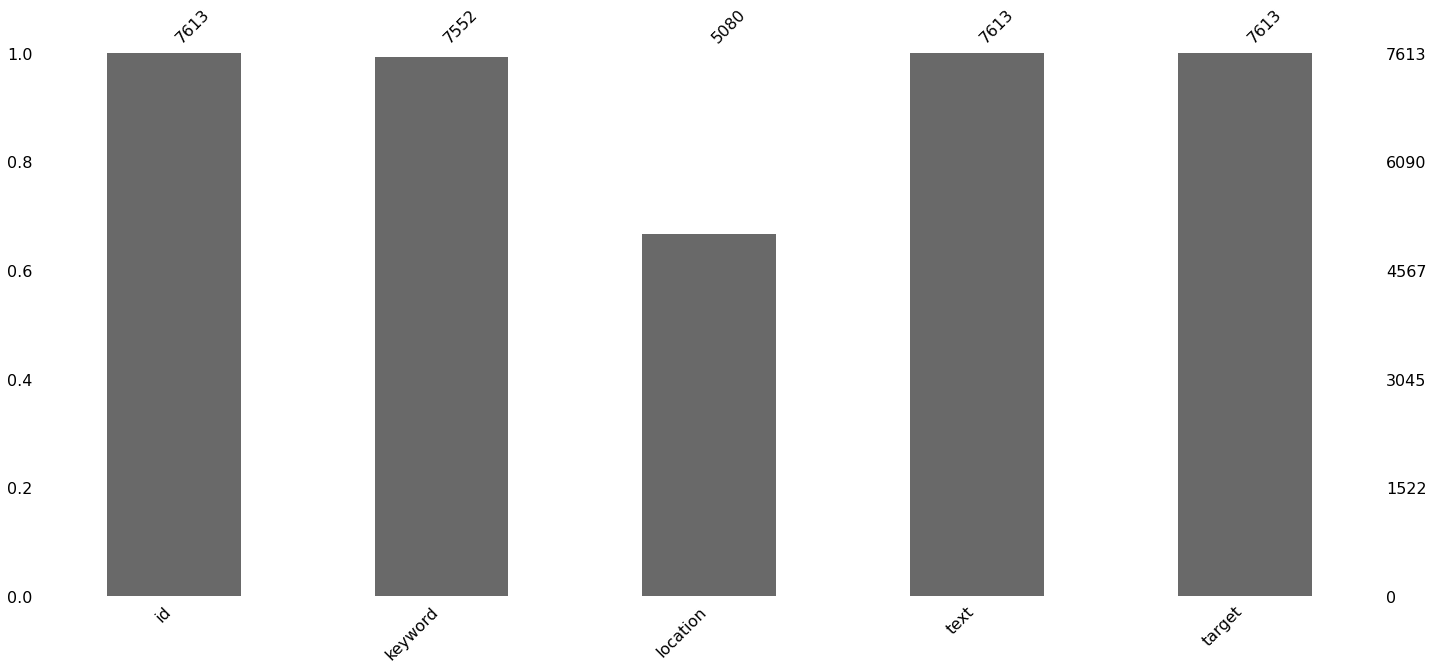

In [5]:
m.bar(df)

In [6]:
df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [7]:
df.text.head(1)

0    Our Deeds are the Reason of this #earthquake M...
Name: text, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
train_text = count_vectorizer.fit_transform(df['text'])
tokens = count_vectorizer.get_feature_names()
#pd.DataFrame(example_text.toarray(),columns=tokens)

In [11]:
test = pd.read_csv('test-20210211-193050.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [17]:
test_text = count_vectorizer.transform(test.text)
tokens = count_vectorizer.get_feature_names()
#pd.DataFrame(test_text.todense(),columns=tokens)

In [19]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,train_text,df['target'],cv=5,scoring='f1')

In [22]:

model.fit(train_text,df['target'])


RidgeClassifier()

In [23]:
ypred = model.predict(test_text)

In [25]:
df_final = pd.DataFrame()
df_final['id'] = test['id']
df_final['target'] = ypred
df_final.to_csv('submission.csv',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4ad0af6-bda7-4005-891d-55dd04dd7cfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>